# Classification

## MINIST

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from sklearn import datasets

In [2]:
mnist = pd.read_csv('mnist_784.csv')

In [3]:
X, y = mnist.values[:, :-1], mnist['class']

In [4]:
X.shape, y.shape

((70000, 784), (70000,))

In [5]:
%matplotlib inline

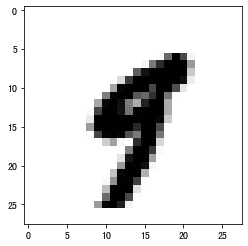

In [6]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary)

In [7]:
y[36000]

9

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## Training a Binary Classififer

In [9]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [10]:
from sklearn.linear_model import SGDClassifier

In [11]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [12]:
sgd_clf.predict([X_test[8]])

array([False])

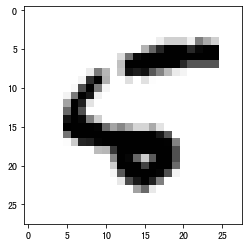

In [13]:
plt.imshow(X_test[8].reshape(28, 28), cmap=matplotlib.cm.binary)

## Performance Measure

### Measuringi Accuracy Using Cross-Validation

In [14]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [15]:
skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_folds = X_train[test_index]
    y_test_folds = (y_train_5[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_folds)
    n_crrect = sum(y_pred == y_test_folds)
    print(n_crrect / len(y_pred))

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.909
0.807
0.901


In [16]:
from sklearn.model_selection import cross_val_score

In [19]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95855, 0.9692 , 0.9582 ])

### Confusion Matrix

In [21]:
from sklearn.metrics import confusion_matr
from sklearn.model_selection import cross_val_predict

In [22]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [24]:
confusion_matrix(y_train_5, y_train_pred)

array([[53452,  1127],
       [ 1154,  4267]])

### Precision and Recall

$$Precision = \frac{TP}{TP + FP}$$

$$Recall = \frac{TP}{TP+FN}$$

In [25]:
from sklearn.metrics import precision_score, recall_score

In [26]:
precision_score(y_train_5, y_train_pred)

0.7910641453466815

In [27]:
recall_score(y_train_5, y_train_pred)

0.7871241468363771

$$\frac{2}{F_1} = \frac{1}{P} + \frac{1}{F}$$

$$F_1 = \frac{2TP}{2TP + FN + FP}$$

### Precision/Recall Tradeoff

In [28]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

In [32]:
from sklearn.metrics import precision_recall_curve

In [40]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [42]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.xlabel('Threshold')
    plt.legend()
    plt.ylim([0, 1])

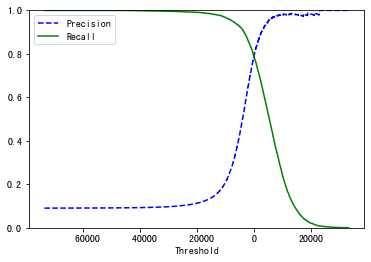

In [43]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

Text(0, 0.5, 'Precision')

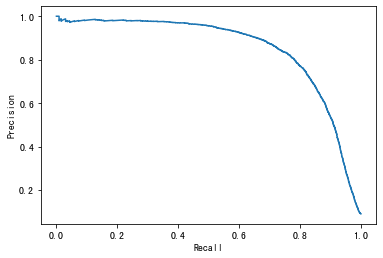

In [47]:
plt.plot(recalls, precisions)
plt.xlabel('Recall')
plt.ylabel('Precision')

### ROC Curve

In [48]:
from sklearn.metrics import roc_curve

In [49]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [53]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

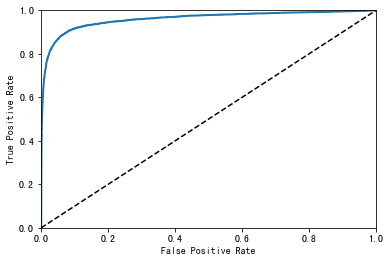

In [54]:
plot_roc_curve(fpr, tpr)

召回率(TPR) 越高，分类器产生的假正类(FPR)就越多。虚线表示纯碎机分类器的ROC曲线；一个越优秀的分类器应该离这条线越远越好.

In [56]:
from sklearn.metrics import roc_auc_score

In [57]:
roc_auc_score(y_train_5, y_scores)

0.9603990240953543

In [60]:
# sgd_clf.fit(X_train, y_train)
# sgd_clf.predict([X_test[0]])

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [64]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.89795, 0.901  , 0.9015 ])

### 错误分析

In [65]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [66]:
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5595,    0,   16,    6,    8,   36,   36,    3,  222,    1],
       [   0, 6418,   41,   21,    3,   39,    5,    6,  199,   10],
       [  25,   27, 5261,   82,   73,   20,   62,   37,  359,   12],
       [  29,   18,  115, 5242,    1,  194,   24,   42,  403,   63],
       [  11,   15,   45,   10, 5222,   10,   38,   20,  318,  153],
       [  27,   17,   32,  157,   54, 4465,   74,   18,  513,   64],
       [  27,   17,   48,    3,   44,   92, 5541,    4,  142,    0],
       [  20,   11,   49,   26,   52,   14,    6, 5694,  184,  209],
       [  16,   66,   42,   88,    3,  120,   30,   10, 5438,   38],
       [  20,   24,   27,   64,  128,   34,    1,  174,  344, 5133]])

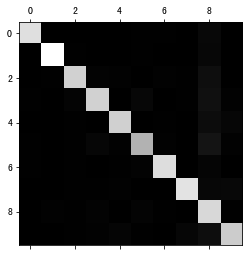

In [67]:
plt.matshow(conf_mx, cmap=plt.cm.gray)

大多数图片都在主对角线上，说明被正确的分类。